# <span style="color:navy; font-size:40px;">Assignment 2</span>
# Bank Marketing Dataset 

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Tools for creating iterators for efficient looping
import itertools

# Numpy for numerical operations
import numpy as np
from numpy import mean, std

# Pandas for data manipulation
import pandas as pd

# Scipy for statistical tests
import scipy.stats as stats
from scipy.stats import shapiro, normaltest

# Matplotlib for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for enhanced data visualisation
import seaborn as sns

# IPython display utilities
from IPython.display import Markdown, display

# Category Encoders for encoding categorical variables
import category_encoders as ce

# Scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold  # Data splitting and cross-validation
# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, auc, 
    roc_curve, confusion_matrix, ConfusionMatrixDisplay, 
    classification_report, roc_auc_score
)
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data preprocessing
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors algorithm
from sklearn.tree import export_text  # Export decision tree in text format
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier

# Mlxtend for additional plotting utilities
from mlxtend.plotting import plot_decision_regions

# Part A (Predicting Bank Marketing Campaign Outcomes)

## Task 1: Exploratory Data Analysis (EDA)

In [14]:
# Loading Marketing Bank Dataset
mbd = pd.read_csv("bank.csv",delimiter=';')

In [15]:
display(Markdown("### Dataset Display and Basic Information"))

display(Markdown("**---First Few Rows---**"))
mbd.head()

### Dataset Display and Basic Information

**---First Few Rows---**

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [18]:
# Reloading the dataset with the correct delimiter and quote character
mbd = pd.read_csv("bank.csv", delimiter=';', quotechar='"')

# Giving appropriate name to target class
mbd.rename(columns={'y': 'deposit permission'}, inplace=True)

display(Markdown("**---Dataset Basic Information---**"))
print(mbd.info())

**---Dataset Basic Information---**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 4521 non-null   int64 
 1   job                 4521 non-null   object
 2   marital             4521 non-null   object
 3   education           4521 non-null   object
 4   default             4521 non-null   object
 5   balance             4521 non-null   int64 
 6   housing             4521 non-null   object
 7   loan                4521 non-null   object
 8   contact             4521 non-null   object
 9   day                 4521 non-null   int64 
 10  month               4521 non-null   object
 11  duration            4521 non-null   int64 
 12  campaign            4521 non-null   int64 
 13  pdays               4521 non-null   int64 
 14  previous            4521 non-null   int64 
 15  poutcome            4521 non-null   object
 16  deposit permission  4521

In [19]:
display(Markdown("**---Dataset Null Check---**"))
missing_values = mbd.isnull().sum()
print(missing_values)

display(Markdown("**---Dataset Duplicates Check---**"))
duplicates = mbd.duplicated().sum()
duplicates

**---Dataset Null Check---**

age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
deposit permission    0
dtype: int64


**---Dataset Duplicates Check---**

0

In [20]:
display(Markdown("### Dataset Summary Statistics for Numerical"))
mbd.describe()

### Dataset Summary Statistics for Numerical

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [21]:
display(Markdown("### Dataset Summary for Categorical"))
mbd.describe(include=['object', 'category'])

### Dataset Summary for Categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit permission
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [24]:
numerical_data = mbd.select_dtypes(include=['int64', 'float64']).columns

z_scores = stats.zscore(mbd[numerical_data])

outlier_threshold = 3
outliers_z_scores = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

display(Markdown("### Detecting Outliers using Z Score Method"))
display(Markdown("#### Numerical Data Only:"))
print(outliers_z_scores.sum())

### Detecting Outliers using Z Score Method

#### Numerical Data Only:

age          44
balance      88
day           0
duration     88
campaign     87
pdays       171
previous     99
dtype: int64


### Data Distribution

### Histograms for Numerical Data

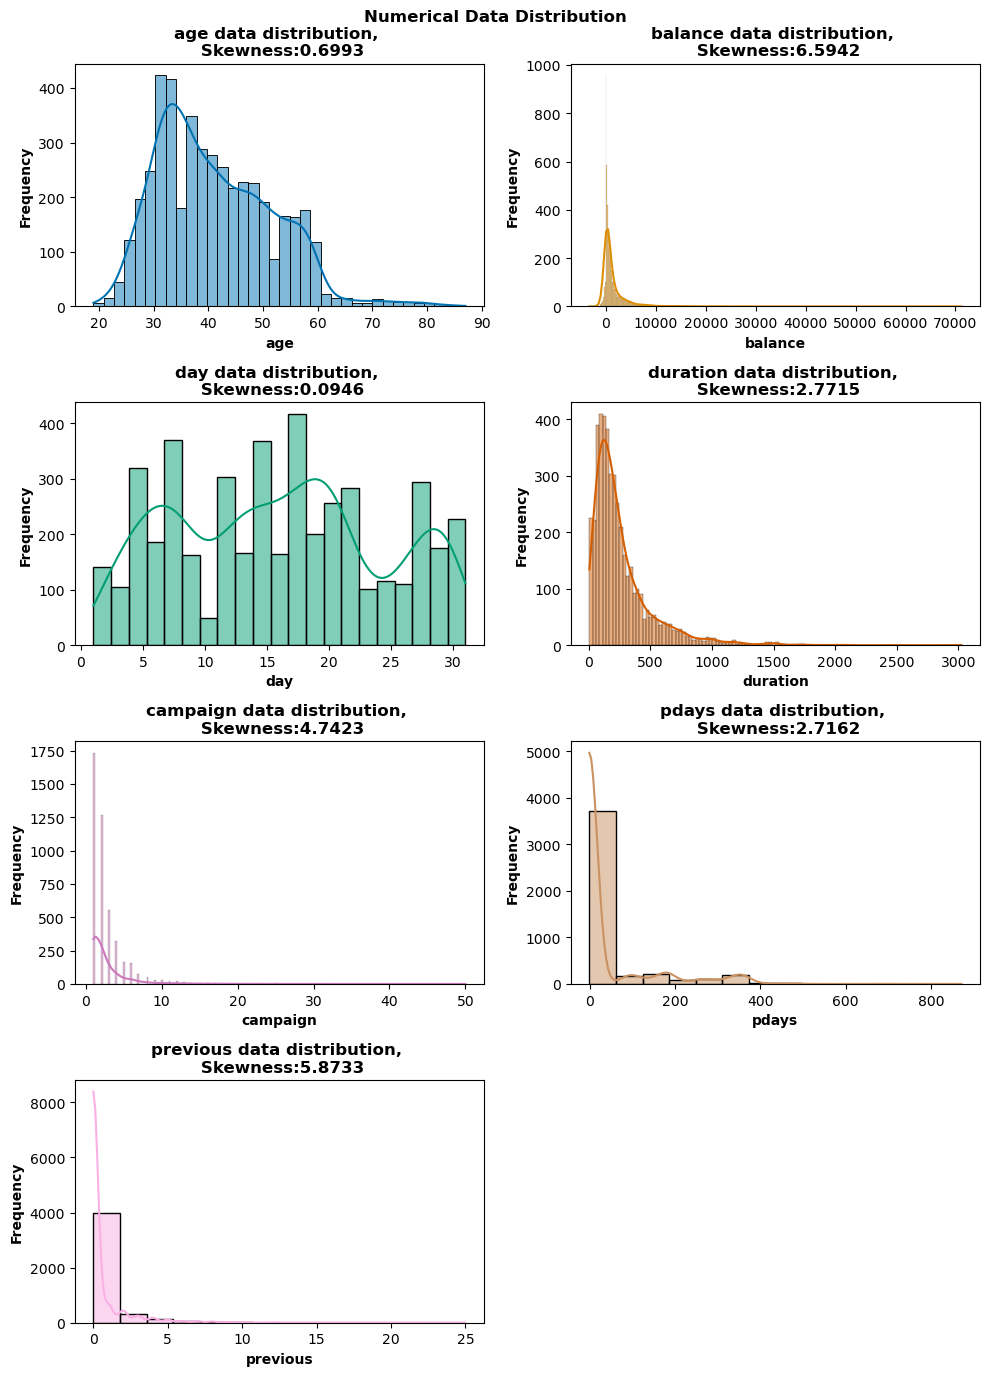

In [28]:
display(Markdown("### Data Distribution"))
display(Markdown("### Histograms for Numerical Data"))

fig, axes_array = plt.subplots(4,2, figsize=(10,14))
axes_list = axes_array.flatten()
color_list = sns.color_palette('colorblind',n_colors=len(numerical_data))
for col, ax, color in zip(numerical_data,axes_list,color_list):
    sns.histplot(x=mbd[col],ax=ax,color=color,kde=True)
    skewness = stats.skew(mbd[col])
    ax.set_title(f"{col} data distribution, \n Skewness:{skewness:.4f}", fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel("Frequency", fontweight='bold')

    
fig.suptitle("Numerical Data Distribution", fontweight='bold')
plt.tight_layout()
plt.show()